<a href="https://colab.research.google.com/github/sajjadmardanirad/sajjadmardanirad/blob/main/end_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
from datetime import datetime
from sklearn import preprocessing
import pandas as pd
import numpy as np
import random as rnd
import os
import re
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (8, 6)
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn import feature_selection
import xgboost as xgb # XGBOOST
from xgboost.sklearn import XGBClassifier # XGBOOST
import hyperopt #CatBoost
from catboost import Pool, CatBoostClassifier #CatBoost
import lightgbm as lgb # Light GBM
import statsmodels.api as sm # Logistic Regression with StatModels
from sklearn.decomposition import PCA

# Evalaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Grid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


# Stacking
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

# Warnings
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

import time
import datetime
import platform

In [ ]:
!ls

end_PREDICTION.ipynb  mydataset-classification-Ramin.xlsx


In [ ]:
import pandas as pd
data = pd.read_excel (r'mydataset-classification-Ramin.xlsx')
data.head(5)

,NAME,BLOCK,DP,Rate,WTB,BRPM,TQ,PRE,FI,FO,...,VIS,PV,YP,GS1,GS2,FL,SOL,SECTION,FM,LABEL
0,55,ISH,823,4.081633,30.8,139.0,4.3,1084.0,726.0,43.05,...,36,6,15,7,8,60,8,17.5,AJ,No-Loss
1,55,ISH,824,4.545455,35.2,119.0,4.3,877.0,663.0,37.56,...,36,6,15,7,8,60,8,17.5,AJ,No-Loss
2,55,ISH,825,5.172414,32.9,117.0,4.4,780.0,643.0,37.30,...,36,6,15,7,8,60,8,17.5,AJ,No-Loss
3,55,ISH,826,8.333333,25.2,121.0,3.9,950.0,701.0,38.48,...,36,6,15,7,8,60,8,17.5,AJ,No-Loss
4,55,ISH,827,7.594937,32.0,129.0,4.3,1214.0,788.0,40.54,...,36,6,15,7,8,60,8,17.5,AJ,No-Loss


In [ ]:
data.dtypes

NAME        object
BLOCK       object
DP           int64
Rate       float64
WTB        float64
BRPM       float64
TQ         float64
PRE        float64
FI         float64
FO         float64
STK        float64
MW         float64
VIS          int64
PV           int64
YP           int64
GS1          int64
GS2          int64
FL          object
SOL          int64
SECTION    float64
FM          object
LABEL       object
dtype: object

In [ ]:
data=data.dropna()

In [ ]:
data.keys()

Index(['NAME', 'BLOCK', 'DP', 'Rate', 'WTB', 'BRPM', 'TQ', 'PRE', 'FI', 'FO',
       'STK', 'MW', 'VIS', 'PV', 'YP', 'GS1', 'GS2', 'FL', 'SOL', 'SECTION',
       'FM', 'LABEL'],
      dtype='object')

In [ ]:
data['NAME'] = data['NAME'].astype('category')
data['NAME'] = data['NAME'].cat.codes

data['BLOCK'] = data['BLOCK'].astype('category')
data['BLOCK'] = data['BLOCK'].cat.codes

data['FL'] = data['FL'].astype('category')
data['FL'] = data['FL'].cat.codes

data['FM'] = data['FM'].astype('category')
data['FM'] = data['FM'].cat.codes

data['LABEL'] = data['LABEL'].astype('category')
data['LABEL'] = data['LABEL'].cat.codes

In [ ]:
data['LABEL']=data['LABEL']+1
set(data['LABEL'])

{1, 2, 3, 4, 5}

In [ ]:
data.dtypes

NAME          int8
BLOCK         int8
DP           int64
Rate       float64
WTB        float64
BRPM       float64
TQ         float64
PRE        float64
FI         float64
FO         float64
STK        float64
MW         float64
VIS          int64
PV           int64
YP           int64
GS1          int64
GS2          int64
FL            int8
SOL          int64
SECTION    float64
FM            int8
LABEL         int8
dtype: object

In [ ]:
col=[  'DP', 'Rate', 'WTB', 'BRPM', 'TQ', 'PRE', 'FI', 'FO',
       'STK', 'MW', 'VIS', 'PV', 'YP', 'GS1', 'GS2',  'SOL', 'SECTION']
normalized_df=(data[col]-data[col].min())/(data[col].max()-data[col].min())

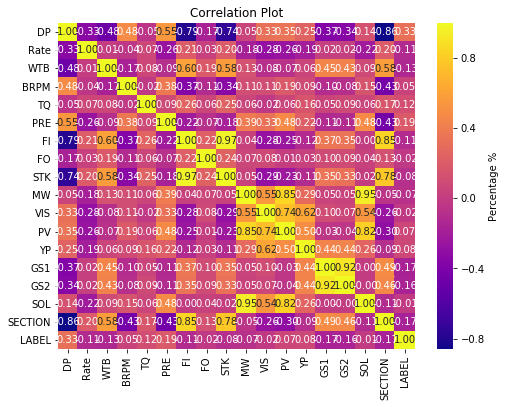

In [ ]:
# Histogram
Survived = data['LABEL'].copy()
train_df = normalized_df#data.drop('Stratege(micro)', axis=1).copy()
traindex = train_df.index
f, ax = plt.subplots(figsize=[8,6])
sns.heatmap(pd.concat([normalized_df, Survived], axis=1).corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap="plasma",ax=ax)
ax.set_title("Correlation Plot")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import genfromtxt
from numpy import argmax
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.optimizers import SGD,RMSprop,adam
from keras import callbacks

from sklearn.metrics import classification_report,confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
Survived = data['LABEL'].copy()
train_df = data.drop('LABEL', axis=1).copy()
from sklearn import preprocessing
continuous_features = col
for col in continuous_features:
    transf = data[col].values.reshape(-1,1)
    scaler = preprocessing.MinMaxScaler().fit(transf)
    train_df[col] = scaler.transform(transf)
train_df['Survived'] = Survived

In [ ]:
X_Train, X_Test, y_train, y_test = train_test_split(train_df[continuous_features],train_df['Survived'])
X_Train.shape, y_train.shape, X_Test.shape, y_test.shape

((49036, 17), (49036,), (16346, 17), (16346,))

In [ ]:
sequences = 1 #Lenght of each timestep
result = []
Train_Lales = y_train

print("Train data shape: ", X_Train.shape)
print("Train target shape: ",y_train.shape)


# for loop will walk for each of the total rows
for i in range(0,len(X_Train)):
    # every group must have the same length, so if current loop position i + number 
    # of sequences is higher than df length, breaks
    if i+sequences <= len(X_Train):
        # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
        result.append(X_Train[i:i+sequences].values)     

# Converting to array + keras takes float32 better than 64
train_x = np.array(result).astype('float32')

# making the y into same length as X
train_y = np.array(Train_Lales.tail(y_train.shape[0]).values)

#***************Converting the 5 class lables to OneHot Encoding format************************ 
data = array(train_y)
Y_Train = to_categorical(data)

# invert encoding
# 1 [1,0,0,0,0]
#2 [0,1,0,0,0]
#
#inverted = argmax(Y_Train[0])
#print(inverted)

print("Train data shape: ", train_x.shape)
print("Train target shape: ",Y_Train.shape)


Train data shape:  (49036, 17)
Train target shape:  (49036,)
Train data shape:  (49036, 1, 17)
Train target shape:  (49036, 6)


In [ ]:

sequences = 1 #Lenght of each timestep
result = []
#lables = []

# for loop will walk for each of the 1500 rows
for i in range(0,len(X_Test)):
    # every group must have the same length, so if current loop position i + number 
    # of sequences is higher than df length, breaks
    if i+sequences <= len(X_Test):
        # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
        result.append(X_Test[i:i+sequences].values)
        #lables.append(Test_Lales[i:i+sequences].values)
        


        


# Converting to array + keras takes float32 better than 64
test_x = np.array(result).astype('float32')
# making the y into same length as X
test_y = np.array(y_test)


#***************Converting the 6 class lables to OneHot Encoding format************************
data = array(test_y)
Y_Test = to_categorical(data)

# invert encoding
#inverted = argmax(Y_Train[0])
#print(inverted)

print("Test data shape: ", test_x.shape)
print("Train target shape: ", Y_Train.shape)

Test data shape:  (16346, 1, 17)
Train target shape:  (49036, 6)


In [ ]:
print("An overview of how the data is packed. The data is packed into bins each containing 51 sequences. Each of these sequences have 24 features.")
print("***********Example of the packed train data for the 1st 3 TimeSeries or Bins**********")
print("")

for i in range (0,3):
    print("Training: ", train_x[i])
    print("Lable: ", Y_Test[i])
    print("")

An overview of how the data is packed. The data is packed into bins each containing 51 sequences. Each of these sequences have 24 features.
***********Example of the packed train data for the 1st 3 TimeSeries or Bins**********

Training:  [[0.6029033  0.02105027 0.20714357 0.38202813 0.         0.47434714
  0.10541245 0.37922704 0.41210744 0.16393442 0.31914893 0.2
  0.2888889  0.12       0.1923077  0.14754099 0.2       ]]
Lable:  [0. 0. 1. 0. 0. 0.]

Training:  [[0.8459377  0.00289307 0.13803275 0.52153    0.43089432 0.656618
  0.14054994 0.30440822 0.46524793 0.27868852 0.31914893 0.37777779
  0.44444445 0.16       0.23076923 0.22950819 0.37142858]]
Lable:  [0. 0. 1. 0. 0. 0.]

Training:  [[0.25029266 0.00624397 0.48303688 0.2805126  0.19593497 0.4639529
  0.19996423 0.48496377 0.5783058  0.16393442 0.19148937 0.08888889
  0.22222222 0.24       0.1923077  0.13114753 0.61142856]]
Lable:  [0. 0. 0. 0. 1. 0.]



In [ ]:
print("(Train shape) (Train Lable shape)")
print(train_x.shape, Y_Train.shape)
print(" ")
print("(Test shape) (Test Lable shape)")
print(test_x.shape, Y_Test.shape)

input_shape = (train_x.shape[1], train_x.shape[2])
print(" ")
print("Input Shape for the LSTM model")
print(input_shape)

(Train shape) (Train Lable shape)
(49036, 1, 17) (49036, 6)
 
(Test shape) (Test Lable shape)
(16346, 1, 17) (16346, 6)
 
Input Shape for the LSTM model
(1, 17)


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# GRU

In [ ]:
# Design a LSTM model for training the multivariate timeseries data.
learning_rate = 0.01

Adam = adam(lr= learning_rate)
model_LSTM = Sequential()
model_LSTM.add(GRU(32, input_shape=input_shape))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(100, activation='relu'))
model_LSTM.add(Dense(6,activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam,metrics=['accuracy'])

model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 32)                4800      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 606       
Total params: 8,706
Trainable params: 8,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_num = 100

history_LSTM = model_LSTM.fit(train_x, Y_Train, epochs=epoch_num, batch_size=51, validation_data=(test_x, Y_Test), verbose=1, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 49036 samples, validate on 16346 samples
Epoch 1/100
49036/49036 [==============================] - 5s 110us/step - loss: 0.5033 - acc: 0.7942 - val_loss: 0.3974 - val_acc: 0.8289
Epoch 2/100
49036/49036 [==============================] - 3s 53us/step - loss: 0.4057 - acc: 0.8296 - val_loss: 0.3639 - val_acc: 0.8384
Epoch 3/100
49036/49036 [==============================] - 3s 54us/step - loss: 0.3742 - acc: 0.8416 - val_loss: 0.3334 - val_acc: 0.8530
Epoch 4/100
49036/49036 [==============================] - 3s 54us/step - loss: 0.3504 - acc: 0.8485 - val_loss: 0.3026 - val_acc: 0.8590
Epoch 5/100
49036/49036 [==============================] - 3s 55us/step - loss: 0.3324 - acc: 0.8552 - val_loss: 0.2883 - val_acc: 0.8708
Epoch 6/100
49036/49036 [==============================] - 3s 54us/step - loss: 0.3192 - acc: 0.8604 - val_loss: 0.2641 - val_acc: 0.8776
Epoch 7/100
49036/49036 [==============================] - 3s 55us/step -

49036/49036 [==============================] - 2s 48us/step - loss: 0.1788 - acc: 0.9279 - val_loss: 0.1614 - val_acc: 0.9391
Epoch 58/100
49036/49036 [==============================] - 2s 48us/step - loss: 0.1756 - acc: 0.9301 - val_loss: 0.1669 - val_acc: 0.9375
Epoch 59/100
49036/49036 [==============================] - 3s 54us/step - loss: 0.1724 - acc: 0.9325 - val_loss: 0.1541 - val_acc: 0.9433
Epoch 60/100
49036/49036 [==============================] - 3s 55us/step - loss: 0.1723 - acc: 0.9313 - val_loss: 0.1736 - val_acc: 0.9327
Epoch 61/100
49036/49036 [==============================] - 2s 48us/step - loss: 0.1705 - acc: 0.9321 - val_loss: 0.1778 - val_acc: 0.9300
Epoch 62/100
49036/49036 [==============================] - 2s 48us/step - loss: 0.1729 - acc: 0.9307 - val_loss: 0.1659 - val_acc: 0.9352
Epoch 63/100
49036/49036 [==============================] - 2s 48us/step - loss: 0.1712 - acc: 0.9320 - val_loss: 0.1610 - val_acc: 0.9347
Epoch 64/100
49036/49036 [==============

# LSTM

In [ ]:
# Design a LSTM model for training the multivariate timeseries data.
learning_rate = 0.01

Adam = adam(lr= learning_rate)
model_LSTM = Sequential()
model_LSTM.add(LSTM(32, input_shape=input_shape))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(100, activation='relu'))
model_LSTM.add(Dense(5,activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam,metrics=['accuracy'])

model_LSTM.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                6400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 10,205
Trainable params: 10,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_num = 100

history_LSTM = model_LSTM.fit(train_x, Y_Train, epochs=epoch_num, batch_size=51, validation_data=(test_x, Y_Test), verbose=1, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 49036 samples, validate on 16346 samples
Epoch 1/100
49036/49036 [==============================] - 4s 91us/step - loss: 0.5282 - acc: 0.7831 - val_loss: 0.4089 - val_acc: 0.8231
Epoch 2/100
49036/49036 [==============================] - 3s 57us/step - loss: 0.4201 - acc: 0.8181 - val_loss: 0.3518 - val_acc: 0.8486
Epoch 3/100
49036/49036 [==============================] - 3s 57us/step - loss: 0.3849 - acc: 0.8323 - val_loss: 0.3198 - val_acc: 0.8570
Epoch 4/100
49036/49036 [==============================] - 3s 59us/step - loss: 0.3602 - acc: 0.8441 - val_loss: 0.3040 - val_acc: 0.8668
Epoch 5/100
49036/49036 [==============================] - 3s 59us/step - loss: 0.3378 - acc: 0.8533 - val_loss: 0.2852 - val_acc: 0.8807
Epoch 6/100
49036/49036 [==============================] - 3s 59us/step - loss: 0.3225 - acc: 0.8603 - val_loss: 0.2651 - val_acc: 0.8881
Epoch 7/100
49036/49036 [==============================] - 3s 59us/step - 

In [ ]:
# Evaluation of The trained LSTM model

#Prediction on the test data by the trained LSTM 
result_LSTM = model_LSTM.predict(test_x)
classes_LSTM = model_LSTM.predict_classes(test_x)

#Evaluation in terms of test loss and test accuracy
test_loss_LSTM, test_acc_LSTM = model_LSTM.evaluate(test_x, Y_Test)

print("")
print("Test Loss")
print(test_loss_LSTM)
print("Test Accuracy")
print(test_acc_LSTM)

16346/16346 [==============================] - 1s 32us/step

Test Loss
0.11953969953462498
Test Accuracy
0.9487336351400955


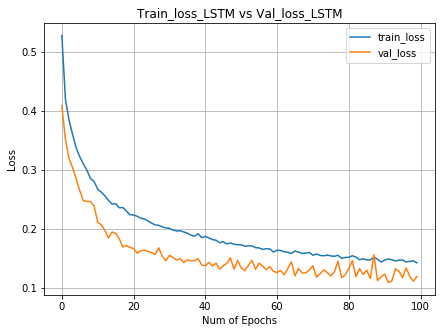

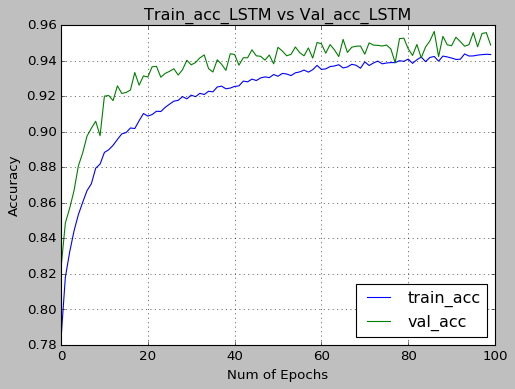

In [ ]:
# visualizing losses and accuracy LSTM
train_loss_LSTM=history_LSTM.history['loss']
val_loss_LSTM=history_LSTM.history['val_loss']

train_acc_LSTM=history_LSTM.history['acc']
val_acc_LSTM=history_LSTM.history['val_acc']

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_LSTM)
plt.plot(xc,val_loss_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Train_loss_LSTM vs Val_loss_LSTM')
plt.grid(True)
plt.legend(['train_loss','val_loss'], loc=1)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_LSTM)
plt.plot(xc,val_acc_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_acc_LSTM vs Val_acc_LSTM')
plt.grid(True)
plt.legend(['train_acc','val_acc'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

In [ ]:
# Design a CNN model for training the multivariate timeseries data.
learning_rate = 0.001

Adam = adam(lr= learning_rate)

model_cNN = Sequential()
model_cNN.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape= input_shape))
model_cNN.add(MaxPooling1D(pool_size=1))
model_cNN.add(Flatten())
model_cNN.add(Dense(50, activation='relu'))
model_cNN.add(Dropout(0.5))
model_cNN.add(Dense(5,activation='softmax'))
model_cNN.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

model_cNN.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1, 64)             1152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 255       
Total params: 4,657
Trainable params: 4,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history_CNN = model_cNN.fit(train_x, Y_Train, epochs=epoch_num, batch_size=51, validation_data=(test_x, Y_Test), verbose=1, shuffle=False)

Train on 49036 samples, validate on 16346 samples
Epoch 1/100
49036/49036 [==============================] - 3s 52us/step - loss: 0.5964 - acc: 0.7692 - val_loss: 0.4468 - val_acc: 0.8145
Epoch 2/100
49036/49036 [==============================] - 2s 34us/step - loss: 0.4460 - acc: 0.8153 - val_loss: 0.3940 - val_acc: 0.8379
Epoch 3/100
49036/49036 [==============================] - 2s 34us/step - loss: 0.4044 - acc: 0.8293 - val_loss: 0.3667 - val_acc: 0.8504
Epoch 4/100
49036/49036 [==============================] - 2s 35us/step - loss: 0.3754 - acc: 0.8407 - val_loss: 0.3393 - val_acc: 0.8590
Epoch 5/100
49036/49036 [==============================] - 2s 35us/step - loss: 0.3510 - acc: 0.8501 - val_loss: 0.3165 - val_acc: 0.8711
Epoch 6/100
49036/49036 [==============================] - 2s 34us/step - loss: 0.3331 - acc: 0.8556 - val_loss: 0.2976 - val_acc: 0.8782
Epoch 7/100
49036/49036 [==============================] - 2s 35us/step - loss: 0.3161 - acc: 0.8644 - val_loss: 0.2856 - 

In [ ]:
#Prediction on the test data by the trained CNN 
result_CNN = model_cNN.predict(test_x)
classes_CNN = model_cNN.predict_classes(test_x)

#Evaluation in terms of test loss and test accuracy
test_loss_CNN, test_acc_CNN = model_cNN.evaluate(test_x, Y_Test)

print("")
print("Test Loss")
print(test_loss_CNN)
print("Test Accuracy")
print(test_acc_CNN)

16346/16346 [==============================] - 0s 23us/step

Test Loss
0.06520852268951863
Test Accuracy
0.97748684693503


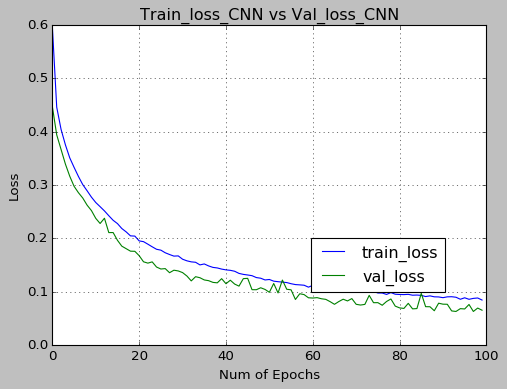

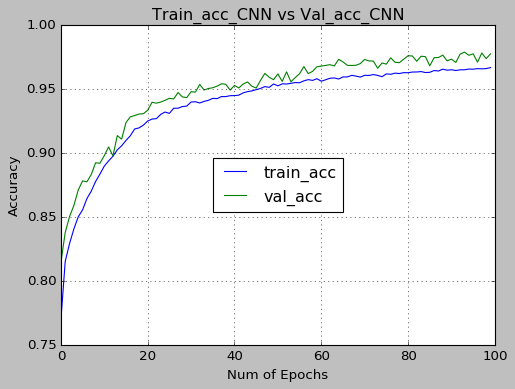

In [ ]:
# visualizing losses and accuracy
train_loss_CNN=history_CNN.history['loss']
val_loss_CNN=history_CNN.history['val_loss']

train_acc_CNN=history_CNN.history['acc']
val_acc_CNN=history_CNN.history['val_acc']

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,val_loss_CNN)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Train_loss_CNN vs Val_loss_CNN')
plt.grid(True)
plt.legend(['train_loss','val_loss'], loc=10, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_CNN)
plt.plot(xc,val_acc_CNN)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_acc_CNN vs Val_acc_CNN')
plt.grid(True)
plt.legend(['train_acc','val_acc'],loc=10)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

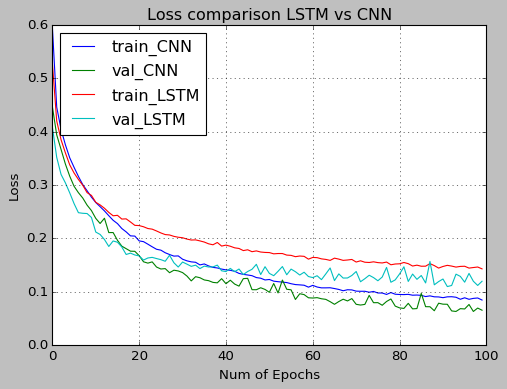

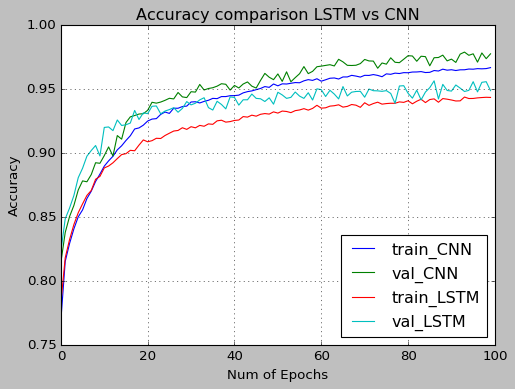

In [ ]:
# visualizing losses and accuracy for CNN

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,val_loss_CNN)
plt.plot(xc,train_loss_LSTM)
plt.plot(xc,val_loss_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Loss comparison LSTM vs CNN')
plt.grid(True)
plt.legend(['train_CNN','val_CNN','train_LSTM','val_LSTM'], loc=2 )
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_CNN)
plt.plot(xc,val_acc_CNN)
plt.plot(xc,train_acc_LSTM)
plt.plot(xc,val_acc_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison LSTM vs CNN')
plt.grid(True)
plt.legend(['train_CNN','val_CNN', 'train_LSTM','val_LSTM'],loc=0)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()


In [ ]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

  class 1(1)       0.86      0.60      0.71        10
  class 2(2)       0.99      0.99      0.99     12395
  class 3(3)       0.90      0.89      0.89       664
  class 4(4)       0.95      0.94      0.95      3219
  class 5(5)       0.96      0.81      0.88        58

    accuracy                           0.98     16346
   macro avg       0.93      0.85      0.88     16346
weighted avg       0.98      0.98      0.98     16346

[[    6     4     0     0     0]
 [    0 12299    11    84     1]
 [    0    12   591    60     1]
 [    0   138    46  3035     0]
 [    1     0    10     0    47]]

Confusion matrix, without normalization


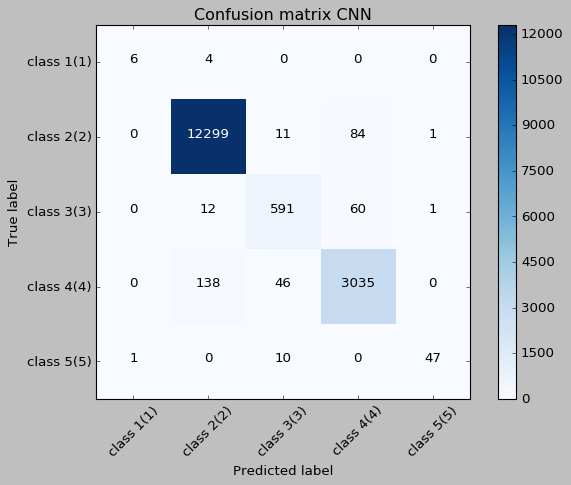

In [ ]:
# Printing the confusion matrix for CNNS

y_pred = classes_CNN

target_names = ['class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)']
print(classification_report(np.argmax(Y_Test,axis=1), y_pred,target_names=target_names))

cnf_matrix_CNN = confusion_matrix(np.argmax(Y_Test,axis=1), y_pred)
print(cnf_matrix_CNN)
print("")

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_CNN, classes=target_names,
                      title='Confusion matrix CNN')
plt.show()

              precision    recall  f1-score   support

  class 1(1)       0.86      0.60      0.71        10
  class 2(2)       0.97      0.97      0.97     12395
  class 3(3)       0.85      0.77      0.81       664
  class 4(4)       0.87      0.89      0.88      3219
  class 5(5)       1.00      0.66      0.79        58

    accuracy                           0.95     16346
   macro avg       0.91      0.78      0.83     16346
weighted avg       0.95      0.95      0.95     16346

[[    6     4     0     0     0]
 [    0 12084    19   292     0]
 [    0    18   511   135     0]
 [    0   295    55  2869     0]
 [    1     0    19     0    38]]

Confusion matrix, without normalization


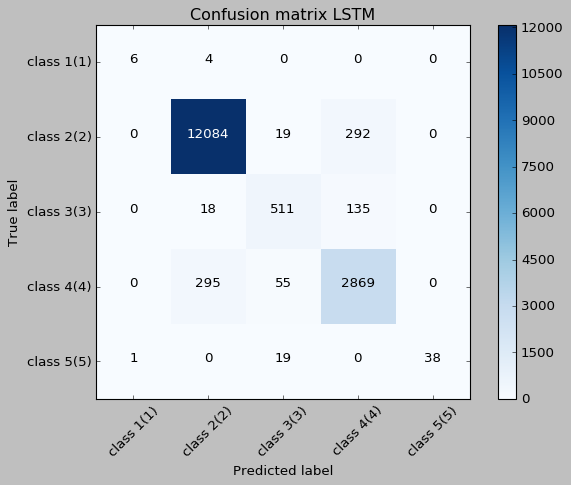

In [ ]:
# Printing the confusion matrix for LSTM

y_pred = classes_LSTM

target_names_LSTM = ['class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)']

print(classification_report(np.argmax(Y_Test,axis=1), y_pred,target_names=target_names_LSTM))

cnf_matrix_CNN = confusion_matrix(np.argmax(Y_Test,axis=1), y_pred)
print(cnf_matrix_CNN)
print("")

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_CNN, classes=target_names_LSTM,
                      title='Confusion matrix LSTM')
plt.show()